In [34]:
import numpy as np
import matplotlib.pyplot as plt
#założenia
N = 31 
dx = 1.0
d = 4.0
x0 = 4.0
max_iter = 500 

In [35]:
x = np.arange(-N, N+1, dx)
y = np.arange(-N, N+1, dx)
X, Y = np.meshgrid(x, y, indexing='ij')
#gęstość ładunku
rho = np.exp(-((X - x0)**2 + Y**2) / d**2) - np.exp(-((X + x0)**2 + Y**2) / d**2)

In [36]:
def compute_S(u, rho):
    #2gie pochodne
    lap_x = (u[2:, 1:-1] + u[:-2, 1:-1] - 2*u[1:-1, 1:-1]) / dx**2
    lap_y = (u[1:-1, 2:] + u[1:-1, :-2] - 2*u[1:-1, 1:-1]) / dx**2
    u_c   = u[1:-1, 1:-1]
    rho_c = rho[1:-1, 1:-1]
    S = -u_c * (0.5 * (lap_x + lap_y) + rho_c)
    return np.sum(S) * dx**2

In [ ]:
u1 = np.zeros_like(X)
S1_vals = []
for it in range(1, max_iter+1):
    u_old = u1.copy()
    u1[1:-1, 1:-1] = (u_old[2:, 1:-1] + u_old[:-2, 1:-1]
                    + u_old[1:-1, 2:] + u_old[1:-1, :-2]
                    + rho[1:-1, 1:-1] * dx**2) / 4.0
    S1_vals.append(compute_S(u1, rho))
    if it == 100:
        u100 = u1.copy()
    if it == 500:
        u500 = u1.copy()

In [38]:
# Funkcja pomocnicza do obliczenia rho'
def compute_rho_prim(u_grid):
    lap = (u_grid[2:,1:-1] + u_grid[:-2,1:-1] + u_grid[1:-1,2:] + u_grid[1:-1,:-2] - 4*u_grid[1:-1,1:-1]) / dx**2
    return -lap

In [39]:
# Obliczenia dla iteracji 100 i 500
rho100_p = compute_rho_prim(u100)
rho500_p = compute_rho_prim(u500)
delta100 = rho100_p - rho[1:-1,1:-1]
delta500 = rho500_p - rho[1:-1,1:-1]

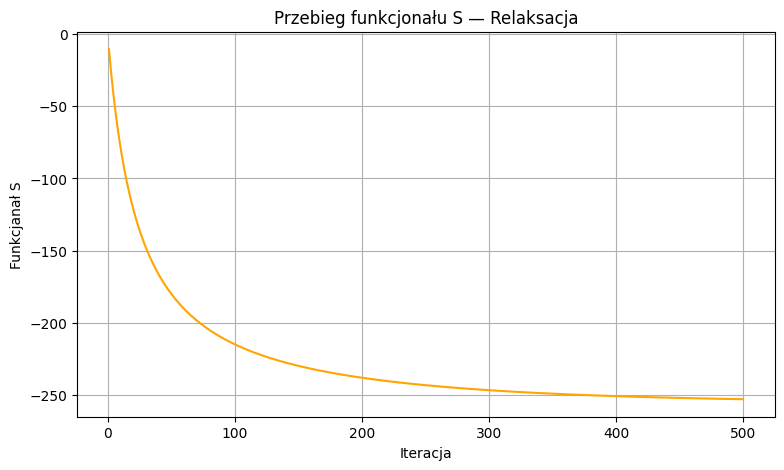

In [40]:
#1.1
plt.figure(figsize=(9,5))
plt.plot(np.arange(1, max_iter+1), S1_vals, 'orange')
plt.xlabel('Iteracja')
plt.ylabel('Funkcjanał S')
plt.title('Przebieg funkcjonału S — Relaksacja')
plt.grid(True)
plt.show()

In [41]:
# Funkcja do rysowania mapy pola
def plot_field(field, title):
    plt.figure()
    plt.imshow(field, origin='lower',extent=[-N+1, N-1, -N+1, N-1])
    plt.colorbar()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(False)
    plt.show()

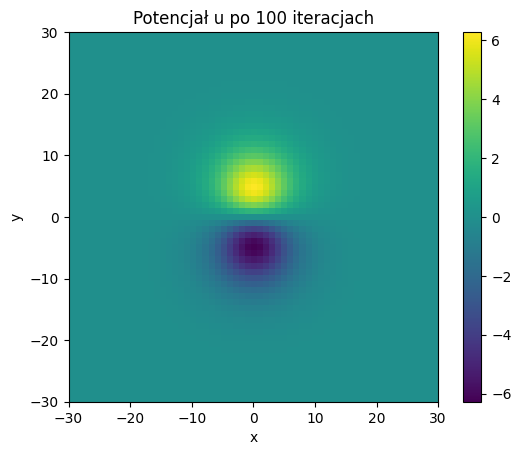

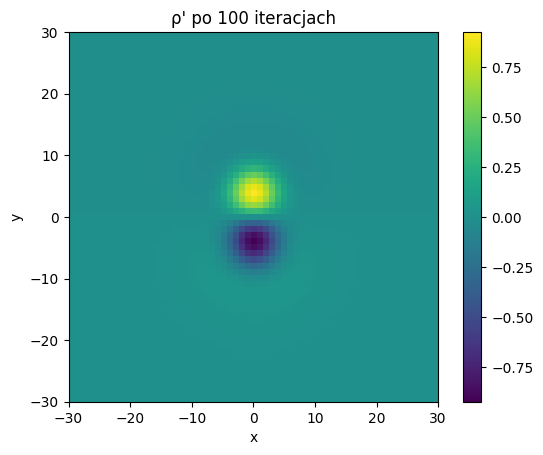

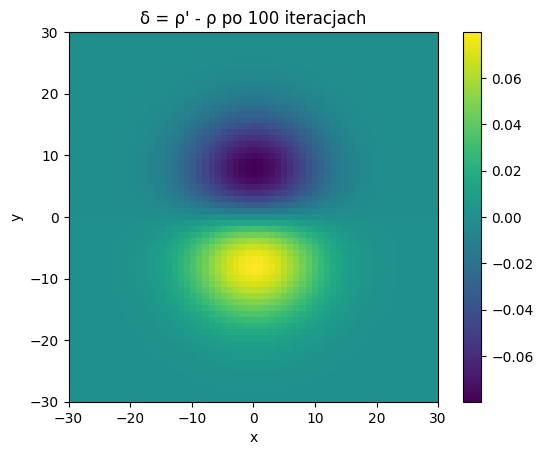

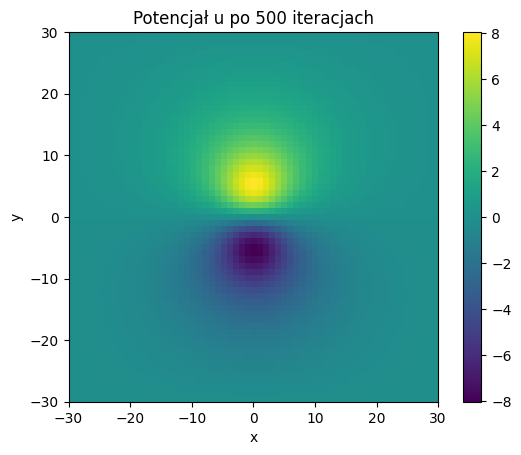

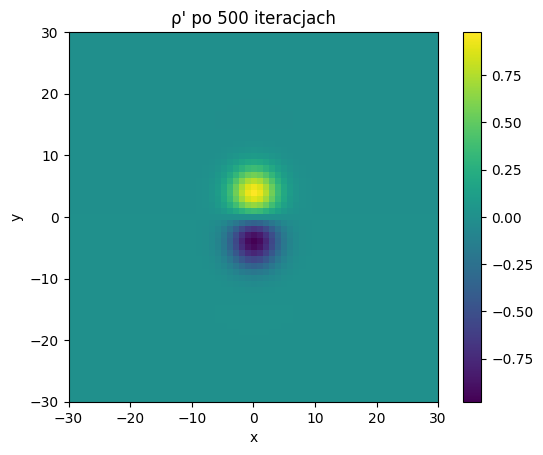

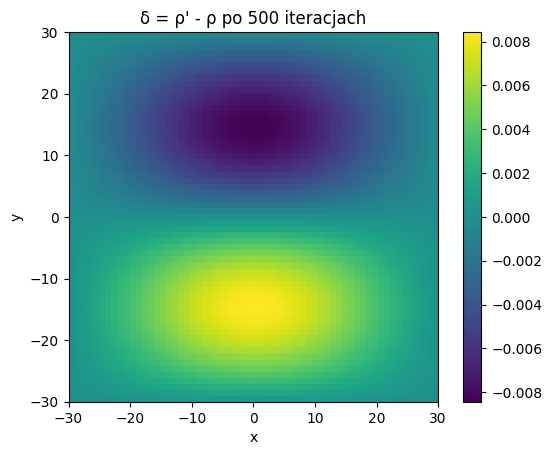

In [42]:
#1.2 i 1.3
# Wyniki po 100 iteracjach
plot_field(u100[1:-1,1:-1], 'Potencjał u po 100 iteracjach')
plot_field(rho100_p, "ρ' po 100 iteracjach")
plot_field(delta100, "δ = ρ' - ρ po 100 iteracjach")

# Wyniki po 500 iteracjach
plot_field(u500[1:-1,1:-1], 'Potencjał u po 500 iteracjach')
plot_field(rho500_p, "ρ' po 500 iteracjach")
plot_field(delta500, "δ = ρ' - ρ po 500 iteracjach")